In [1]:
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim

import torchvision
from matplotlib import pyplot as plt

In [2]:
from Util import plot_curve,plot_image,one_hot,pd_one_hot
import pandas as pd

In [41]:
import numpy as np

设置一次处理多少图片

In [3]:
batch_size = 512

加载图片

In [4]:
# step1. load dataset
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('mnist_data'
                               , train=True, download=True
                               ,transform=torchvision.transforms.Compose([
                                   torchvision.transforms.ToTensor()        #矩阵转化为张量
                                   ,torchvision.transforms.Normalize((0.1307,), (0.3081,))
                               ])
                              )
    ,batch_size=batch_size
    , shuffle=True              # 设置随机打散
)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('mnist_data'
                               ,train=False, download=True
                               ,transform=torchvision.transforms.Compose([
                                   torchvision.transforms.ToTensor()
                                   ,torchvision.transforms.Normalize((0.1307,), (0.3081,))
                               ])
                              ),
    batch_size=batch_size, shuffle=False)

torch.Size([512, 1, 28, 28]) torch.Size([512]) tensor(-0.4242) tensor(2.8215)


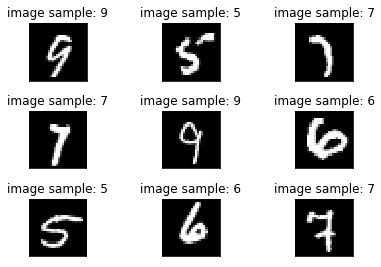

In [5]:
x, y = next(iter(train_loader))   #暂时看作迭代
print(x.shape, y.shape, x.min(), x.max())
plot_image(x, y, 'image sample')

In [82]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net , self).__init__()
        
        self.fc1 = nn.Linear(28*28 , 256)  #输入和输出的维度
        self.fc2 = nn.Linear(256 , 64)
        self.fc3 = nn.Linear(64 , 10)
        
    def forward(self , x):
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        
        return x

初始化网络

In [83]:
net = Net()

In [84]:
optimizer = optim.SGD(net.parameters() , lr = 0.01 , momentum= 0.9)

In [85]:
loss_s = [ ]

In [86]:
for each in range(3):
    for location , (x,y) in enumerate(train_loader):
        x = x.view(x.size(0) , 28*28)
        out = net(x)
        y_onehot = pd_one_hot(y)
        
        loss = F.mse_loss(out , torch.from_numpy(y_onehot).float())
        
        # 清零梯度
        optimizer.zero_grad()
        # 计算梯度
        loss.backward()
        # 更新梯度
        optimizer.step()
        
        if(location % 5 == 0):
            loss_s.append(loss.item())
    print('第' , each+1 , '次迭代完成')

第 1 次迭代完成
第 2 次迭代完成
第 3 次迭代完成


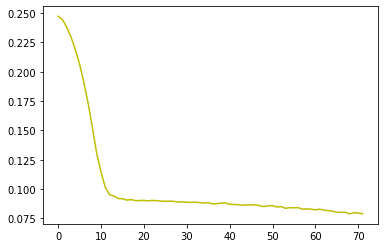

In [87]:
plt.plot(range(len(loss_s)) , loss_s , 'y')
plt.show()

In [88]:
# 存储正确的数量
total_correct = 0

In [89]:
for x,y in test_loader:
    x  = x.view(x.size(0), 28*28)
    out = net(x)
    # out: [b, 10] => pred: [b]
    pred = out.argmax(dim=1)
    correct = pred.eq(y).sum().float().item()
    total_correct += correct

In [90]:
print('正确率：' , total_correct/len(test_loader.dataset))

正确率： 0.4359


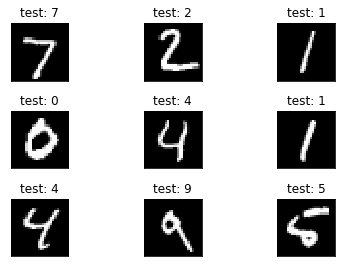

In [81]:
x , y = next(iter(test_loader))
plot_image(x , y , 'test')